# Ford GoBike System Data (Report) 
## by Sharook

## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.
In this project, I will perform an exploratory analysis on data provided by Ford GoBike, a bike-share system provider.

## Preliminary Wrangling

+ I chose Ford GoBike System Data : https://www.fordgobike.com/system-data as my source data
+ This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
+ Multiple data files will need to be joined together if a full year’s coverage is desired. It's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in from June, 2018 to May, 2019.

+ The features included in the dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [21]:
# create the path and get the name list under the path 
currentDir = os.getcwd()
path = currentDir+'/fordgobike/'
text_files = os.listdir(path)
#text_files

# build the frame df by appending each file
file_list = []
print ("reading data... ")
for text_file in text_files:
    #print(text_file)
    filename = path+text_file
    #print(filename)
    df = pd.read_csv(filename)
    file_list.append(df)
df_trip = pd.concat(file_list) 


df_trip_copy =  df_trip.copy()   
print(df_trip_copy.shape)
df_trip_copy

reading data... 
(2293592, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.431060,2100,Subscriber,1975.0,Male,Yes
1,60358,2018-06-30 21:48:19.5570,2018-07-01 14:34:18.1000,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,653,Customer,NaN,NaN,No
2,63654,2018-06-30 20:26:53.0310,2018-07-01 14:07:47.2320,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,50.0,2nd St at Townsend St,37.780526,-122.390288,3235,Subscriber,1962.0,Female,No
3,50508,2018-06-30 20:29:59.8130,2018-07-01 10:31:48.2500,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,37.770030,-122.411726,3675,Subscriber,1992.0,Male,No
4,51697,2018-06-30 18:24:56.6960,2018-07-01 08:46:33.7390,196.0,Grand Ave at Perkins St,37.808894,-122.256460,272.0,Woolsey St at Sacramento St,37.850578,-122.278175,3232,Customer,1989.0,Female,No
5,36708,2018-06-30 20:25:34.2250,2018-07-01 06:37:22.5950,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,577,Customer,NaN,NaN,No
6,46380,2018-06-30 17:23:18.1110,2018-07-01 06:16:18.1660,237.0,Fruitvale BART Station,37.775232,-122.224498,237.0,Fruitvale BART Station,37.775232,-122.224498,1764,Customer,NaN,NaN,No
7,7224,2018-06-30 23:01:00.4000,2018-07-01 01:01:24.4330,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,779,Subscriber,1989.0,Male,No
8,4294,2018-06-30 23:32:03.7060,2018-07-01 00:43:38.0830,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,2491,Subscriber,1996.0,Female,Yes
9,2209,2018-06-30 23:55:13.2100,2018-07-01 00:32:02.3040,133.0,Valencia St at 22nd St,37.755213,-122.420975,55.0,Webster St at Grove St,37.777053,-122.429558,4225,Subscriber,1963.0,Male,Yes


In [5]:
# do some data cleaning : drop nan , remove some insignificant features like 
df_trip_copy.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_trip_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,95.0,Sanchez St at 15th St,2100,Subscriber,1975.0,Male,Yes
1,60358,2018-06-30 21:48:19.5570,2018-07-01 14:34:18.1000,248.0,Telegraph Ave at Ashby Ave,239.0,Bancroft Way at Telegraph Ave,653,Customer,NaN,NaN,No
2,63654,2018-06-30 20:26:53.0310,2018-07-01 14:07:47.2320,23.0,The Embarcadero at Steuart St,50.0,2nd St at Townsend St,3235,Subscriber,1962.0,Female,No
3,50508,2018-06-30 20:29:59.8130,2018-07-01 10:31:48.2500,58.0,Market St at 10th St,88.0,11th St at Bryant St,3675,Subscriber,1992.0,Male,No
4,51697,2018-06-30 18:24:56.6960,2018-07-01 08:46:33.7390,196.0,Grand Ave at Perkins St,272.0,Woolsey St at Sacramento St,3232,Customer,1989.0,Female,No


In [6]:
df_trip_copy.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12516
start_station_name          12516
end_station_id              12516
end_station_name            12516
bike_id                         0
user_type                       0
member_birth_year          114001
member_gender              113829
bike_share_for_all_trip         0
dtype: int64

In [8]:
df_trip_copy.shape

(2293592, 12)

### What is the structure of your dataset?

> The data set includes multiple csv files(12 months) from June, 2018 till May, 2019 with 2293592 rows and 12 features

### What is/are the main feature(s) of interest in your dataset?

>  
+ How long does the average trip take?
+ Is the trip duration affected by weather( months/seasons)?
+ Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Question 1 : How long does the average trip take?

Text(0.5, 0, 'Duration in sec')

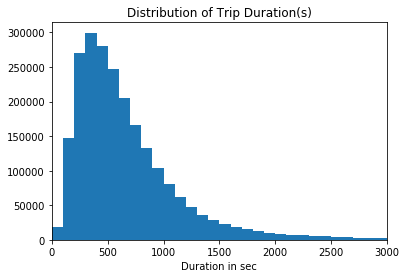

In [10]:
# Let's plot the distribution of trip duration.  
bin_edges = np.arange(0, df_trip_copy['duration_sec'].max() + 100 , 100)
plt.hist(data = df_trip_copy , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,3000)
plt.title('Distribution of Trip Duration(s)')
plt.xlabel('Duration in sec')

> **It is right screwed with a long tail on the right. I am going to add log transformation to x axis.**

> **It is really difficult to look at the plot. I had to increase the bin width to 100 to let the plot show. Measuring trip using seconds is not reasonable. I would change the "duration_sec" to "duration_min" before I add any log transformation.**

Text(0, 0.5, 'Frequency')

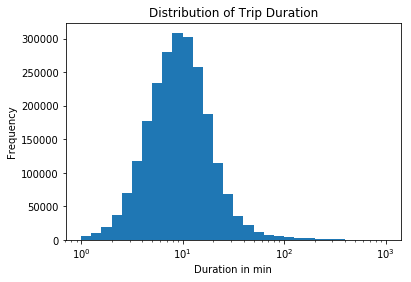

In [11]:
# change the trip duration unit from second to min 
df_trip_copy['duration_min'] = df_trip_copy['duration_sec'] / 60
df_trip_copy.drop('duration_sec' , axis = 1 , inplace = True)

bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_trip_copy , x = 'duration_min' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('Duration in min');
plt.xscale('log');
plt.title('Distribution of Trip Duration')
plt.ylabel('Frequency');

> **we can see through the plot, most people tend to use the bikes for short-time trips ( around 10 mins).**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the varibale that I use to answer the above question was really difficult to look at the plot, so I transform the duration_sec variable to a new variable which is duration_min

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I introduced new varaible that extracted from the duration_sec variable. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [13]:
# some data engineering should be conducted: 
# create month_start column by extracting months of start_time 

df_trip_copy['month_start'] = pd.DatetimeIndex(df_trip_copy['start_time']).month
df_trip_copy['month_start'].value_counts()


#method 2 to extract year, month, date
#df['start_time'] = pd.to_datetime(df['start_time'])

#df['start_year'] = df['start_time'].dt.year
#df['start_month'] = df['start_time'].dt.month
#df['start_day'] = df['start_time'].dt.day

3     256299
4     239111
10    201458
7     199222
6     195968
8     192162
1     192082
9     186217
2     183412
5     182163
11    134135
12    131363
Name: month_start, dtype: int64

Question 2. Is the trip duration affected by weather (months)?

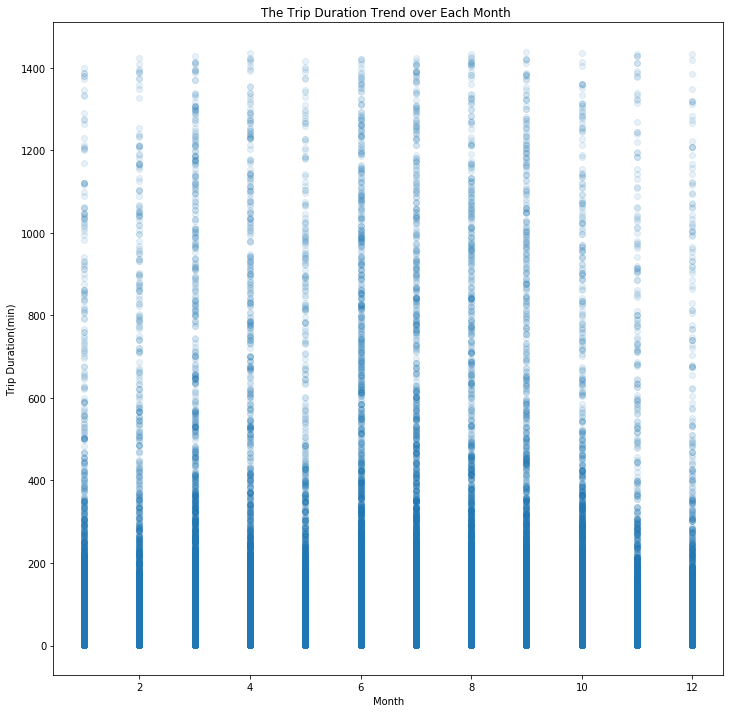

In [16]:
# We can check the trip duration over changes over each month.
plt.figure(figsize = [12,12]) # make the whole figure bigger to show all 
plt.scatter(data = df_trip_copy , x = 'month_start' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

June to Auguts in 2018 has the most duration. Other seasons do not have significant difference.

Question 3. Is the trip duration affected by weather (seasons)?

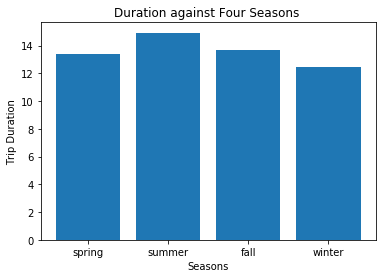

In [15]:
# Create 4 season categories
spring_dur = df_trip_copy.query('month_start in ["3" , "4" , "5"]' ).duration_min.mean ()
summer_dur = df_trip_copy.query('month_start in ["6" , "7" , "8"] ').duration_min.mean()
fall_dur = df_trip_copy.query('month_start in ["9" , "10" , "11"] ').duration_min.mean()
winter_dur = df_trip_copy.query('month_start in ["12" , "1" , "2"]' ).duration_min.mean()
# here the month must be double quote characters, otherwise, give me systax errors


plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

In [17]:
spring_dur , summer_dur , fall_dur , winter_dur

(13.364010077142751, 14.928832965580831, 13.66316596717842, 12.45105223629826)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> + As we expected, summer has the longest trip duration , with average above 14 mins. But there is no significant difference of trip duration in terms of four seasons. It is probably because the weather in San Francisco bay area does not change that much.
+ What surprised me the most is fall has the lowest trip duration in 2018. Fall is most likely to experience good weather with pleasant average temperatures in SF. People are more likely to go out and exercise .
+ After checking the news, it is likely caused by Wildfires in Northern California(11/9/2018) which lead to the worst air quality in SF for months.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The weather does affect trip duration, but the affect is very limited. Unlike cities like Boston, New York, which have very different four seasons, the weather in SF does not change that much.

> What surprised me is that the lower mean trip durations occur in Spring and Fall. In terms of Fall, one reason could be that the air quality in fall 2018 SF was really bad, which prevented more people doing outdoor activities. What could be the potential factor for lower trip duration in Spring ? I want to see if the user type could be a reason.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Question 4. Does the above depend on if a user is a subscriber or customer?

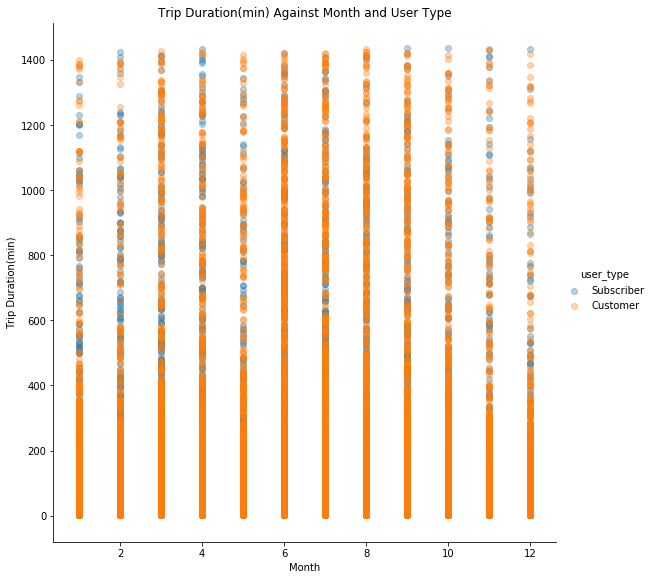

In [20]:
# I want to find out if user type lead to the lower trip duration 

g = sb.FacetGrid(data =  df_trip_copy, hue = 'user_type', height = 8)
g.map(plt.scatter, 'month_start','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As we can see through the plot above, there are far more customers than subscribers. The user type does make an impact on trip duration.
### Were there any interesting or surprising interactions between features?

> An interesting point is that subscribers tend to rent the bikes for long trips, above 350 minutes.



> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!